In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [96]:
df = pd.read_csv(".\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [98]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [99]:
df.drop(columns=["RowNumber" ,"CustomerId","Surname"], inplace=True)

In [100]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [101]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [102]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True).astype(int)

In [103]:
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [104]:
from sklearn.preprocessing import StandardScaler
scale  = StandardScaler()
trained_scale_x = scale.fit_transform(X_train)
test_scale_x = scale.fit_transform(X_test)

In [105]:
trained_scale_x

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [106]:
test_scale_x

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [107]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [124]:
model = Sequential()
model.add(Dense(11,activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 11)                132       
                                                                 
 dense_12 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [125]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [159]:
history = model.fit(trained_scale_x,y_train, epochs=100, validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8672 - val_loss: 0.3648 - val_accuracy: 0.8494
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8686 - val_loss: 0.3630 - val_accuracy: 0.8550
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8678 - val_loss: 0.3635 - val_accuracy: 0.8525
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3126 - accuracy: 0.8687 - val_loss: 0.3650 - val_accuracy: 0.8494
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8686 - val_loss: 0.3634 - val_accuracy: 0.8531
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8683 - val_loss: 0.3645 - val_accuracy: 0.8525
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8691 - val_loss: 0.3624 - val_accuracy: 0.8519

In [127]:
model.layers[0].get_weights()

[array([[-0.08536869, -0.1318864 , -0.01897319, -0.21608366, -0.46872267,
         -0.35622236,  0.05475621, -0.15520458, -0.04276291, -0.37583405,
          0.3267961 ],
        [ 0.4376231 ,  0.01818095,  0.89575917,  1.0277295 , -0.1729189 ,
          0.5897817 , -0.33768177,  0.08765946,  0.532873  , -0.25483745,
         -0.43456393],
        [ 0.15107167, -0.07551067, -0.14415136, -0.02125038, -0.21532671,
          0.4691194 ,  0.10913424,  0.30439085, -0.01123884, -0.20808433,
          0.03409265],
        [-0.22596565, -0.02288592,  0.6498084 , -0.63929224, -0.196691  ,
         -0.8104255 ,  0.20813076, -0.20968668, -0.11018034, -0.15557586,
         -0.29282498],
        [ 0.9888347 ,  0.9482064 ,  0.61655116, -0.6629082 ,  0.09346183,
         -0.5686339 ,  0.79019785, -0.10160949,  0.59974986,  0.13740356,
          0.1064434 ],
        [ 0.06725953, -0.1426661 ,  0.04788881, -0.10031049, -0.147885  ,
          0.15062782,  0.68382466,  0.06506201, -0.13845631, -0.0889250

In [128]:
model.layers[1].get_weights()

[array([[-0.05297706, -1.3311679 , -0.39778772, -0.41005147,  0.46306545,
         -0.36658376, -0.42214286,  0.10741869,  0.04041952,  0.27093667,
          1.0860184 ],
        [-0.21867155, -0.2800685 , -0.06626157,  0.20738462, -0.06999853,
         -0.4402264 , -0.04589682, -0.32884884,  0.28896183, -0.2401715 ,
          1.0791639 ],
        [-0.74724776, -0.27188253, -2.725683  , -0.3391868 , -0.77492076,
          0.04433112,  0.18899614, -0.47540158, -0.6138076 , -0.71050674,
          0.41894865],
        [-0.5025545 ,  0.40745044, -0.33222786,  0.2021137 ,  0.13776559,
         -0.09118376,  0.13941155, -0.21816681, -0.20373102,  0.65796465,
         -0.9109249 ],
        [ 0.21885388, -0.0136606 ,  0.00488677,  0.22284496, -0.25151113,
          0.30497184, -0.05050084, -0.05068788,  0.47868943,  0.33192027,
         -0.01041716],
        [-0.02029798, -0.18393554, -0.15491693,  0.4057681 , -0.5251459 ,
          0.50456727,  0.25846377, -0.21570809, -0.48875067, -0.039649 

In [145]:
y_log = model.predict(test_scale_x)

63/63 [==============================] - 0s 2ms/step


In [146]:
y_predicted = np.where(y_log >= 0.5, 1,0 )

In [151]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predicted)
accuracy

0.86

In [160]:
history.history

{'loss': [0.31366634368896484,
  0.31283238530158997,
  0.31223729252815247,
  0.31256988644599915,
  0.31312426924705505,
  0.3124504089355469,
  0.3128327429294586,
  0.3128446340560913,
  0.31296369433403015,
  0.31286534667015076,
  0.3125130534172058,
  0.3126334249973297,
  0.31185996532440186,
  0.31241360306739807,
  0.3119073808193207,
  0.31232231855392456,
  0.3125377297401428,
  0.31304335594177246,
  0.3124983012676239,
  0.3129144608974457,
  0.3123811185359955,
  0.31229788064956665,
  0.313230037689209,
  0.31244194507598877,
  0.31305384635925293,
  0.31281429529190063,
  0.3119378983974457,
  0.3130420446395874,
  0.31267955899238586,
  0.3123740255832672,
  0.31207719445228577,
  0.3116813600063324,
  0.3122621476650238,
  0.31268420815467834,
  0.3124534785747528,
  0.312453955411911,
  0.31186094880104065,
  0.31212908029556274,
  0.3123742341995239,
  0.31216496229171753,
  0.31209903955459595,
  0.312160849571228,
  0.31249991059303284,
  0.31324928998947144,
  0

In [162]:
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
accuracy = history.history['accuracy']

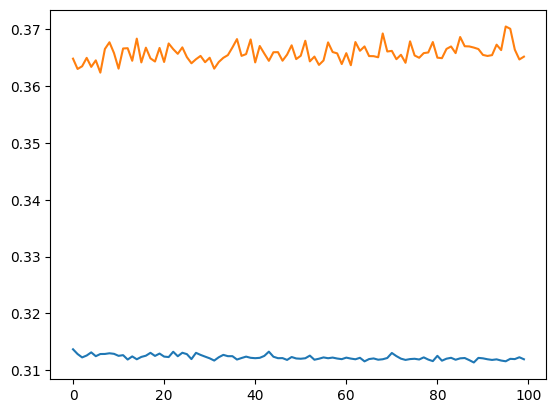

In [170]:
plt.plot(loss)
plt.plot(val_loss)


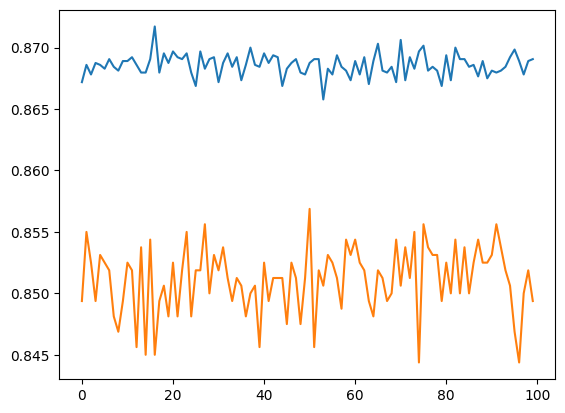

In [171]:
plt.plot(accuracy)
plt.plot(val_accuracy)